In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import sys
# print(o)

In [3]:
import os
os.getcwd()

'C:\\Users\\Abc\\Desktop\\projects'

In [2]:
titanic = pd.read_csv('C:/Users/Abc/Downloads/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

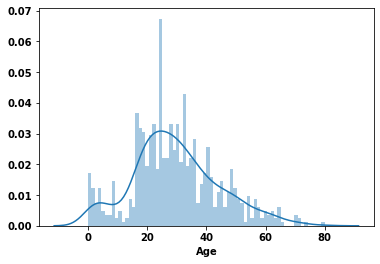

In [10]:
sns.distplot(titanic['Age'],bins=70,hist=True)
# import seaborn as sns
# sns.countplot(data=titanic,x='Sex')
# titanic.columns

In [9]:
titanic['Age'] = titanic['Age'].round()

In [33]:
titanic[titanic['Age'].isnull()==True].shape[0]

177

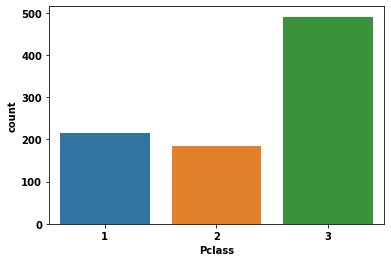

In [11]:
sns.countplot('Pclass',data=titanic)

In [12]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

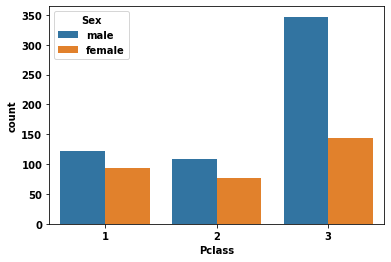

In [15]:
sns.countplot('Pclass',data=titanic,hue='Sex')

In [18]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [21]:
titanic['person'] = titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [23]:
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

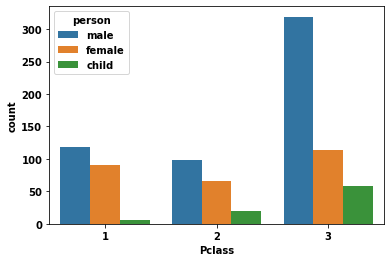

In [26]:
sns.countplot('Pclass',data=titanic,hue='person')

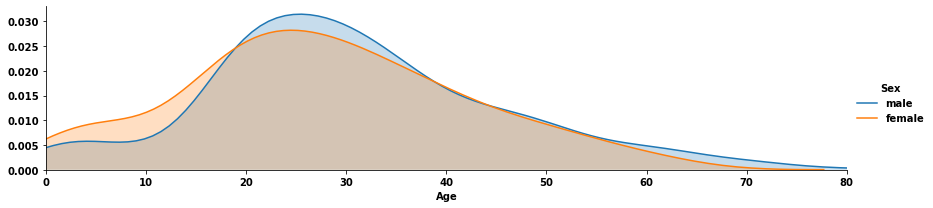

In [30]:
fig = sns.FacetGrid(titanic,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

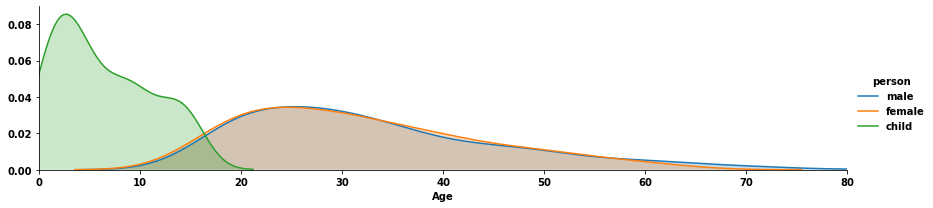

In [31]:
fig = sns.FacetGrid(titanic,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

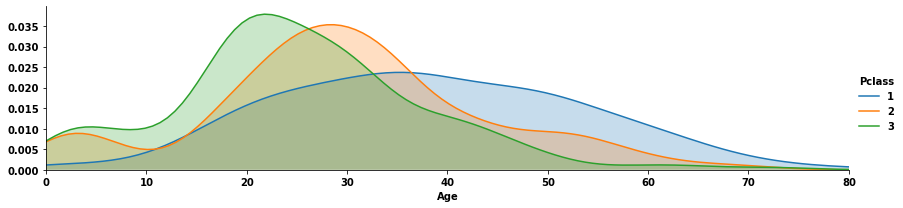

In [42]:
fig = sns.FacetGrid(titanic,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [43]:
deck = titanic['Cabin'].dropna()

In [44]:
decks = []
for d in deck:
    decks.append(d[0])

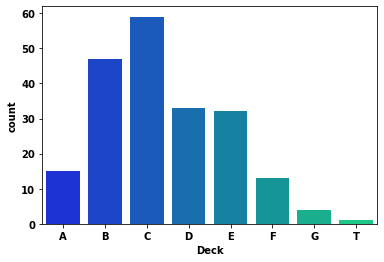

In [51]:
cabin_df = pd.DataFrame(decks,columns=['Deck'])
sns.countplot(cabin_df['Deck'],palette='winter',order=['A','B','C','D','E','F','G','T'])

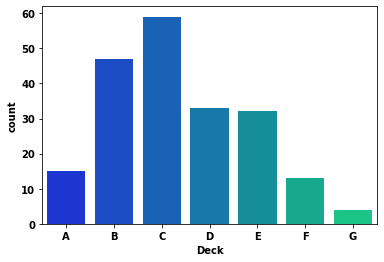

In [54]:
cabin_df= cabin_df[cabin_df['Deck'] != 'T']
sns.countplot(cabin_df['Deck'],palette='winter',order=['A','B','C','D','E','F','G'])

In [56]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


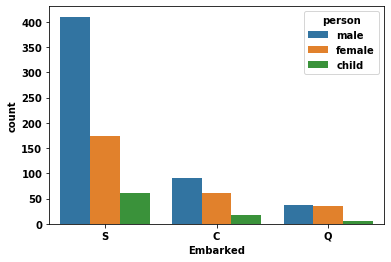

In [60]:
sns.countplot(titanic['Embarked'],hue=titanic['person'])

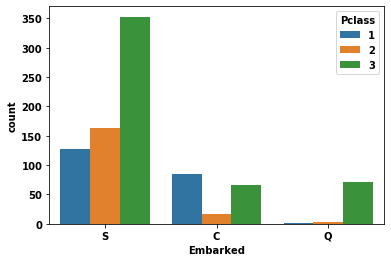

In [61]:
sns.countplot(titanic['Embarked'],hue=titanic['Pclass'])

In [62]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [66]:
def alone_wthfamily(relation):
    sib,parch = relation
    if(sib ==0 and parch ==0):
        return 'Alone'
    else:
        return 'With family'

In [68]:
titanic['Alone'] = titanic[['SibSp','Parch']].apply(alone_wthfamily,axis=1)

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


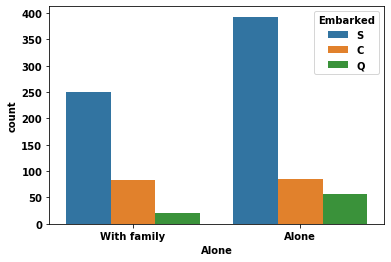

In [71]:
sns.countplot(titanic['Alone'],hue=titanic['Embarked'])

In [72]:
titanic['Survivor'] = titanic.Survived.map({0:'No',1:'Yes'})

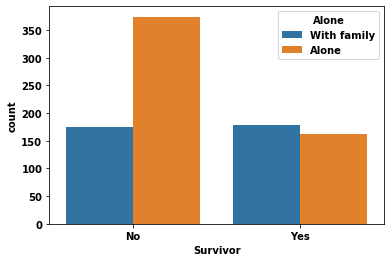

In [74]:
sns.countplot(titanic['Survivor'],hue=titanic['Alone'])

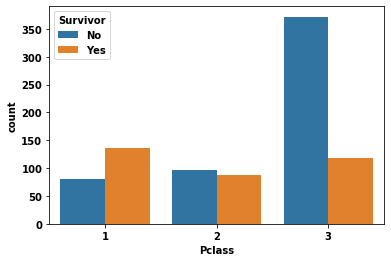

In [82]:
sns.countplot(titanic['Pclass'],hue=titanic['Survivor'])

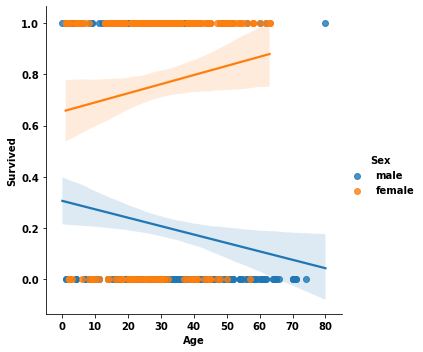

In [85]:
sns.lmplot('Age','Survived',data=titanic,hue='Sex')

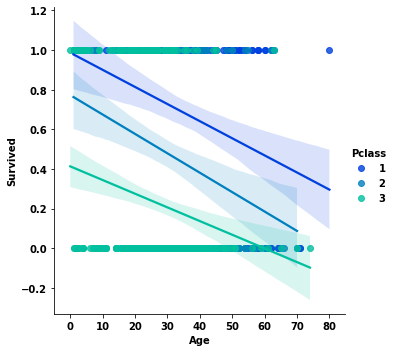

In [86]:
sns.lmplot('Age','Survived',data=titanic,hue='Pclass',palette='winter')

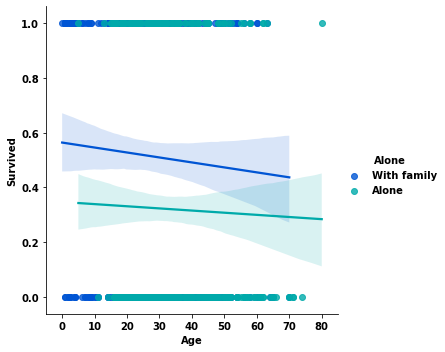

In [87]:
sns.lmplot('Age','Survived',data=titanic,hue='Alone',palette='winter')